In [78]:
import cv2
import pytesseract
import os
import pandas as pd
import matplotlib.pyplot as plt

In [79]:
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

In [80]:
image_folder = "images"
results = []


Processing: insurance.png


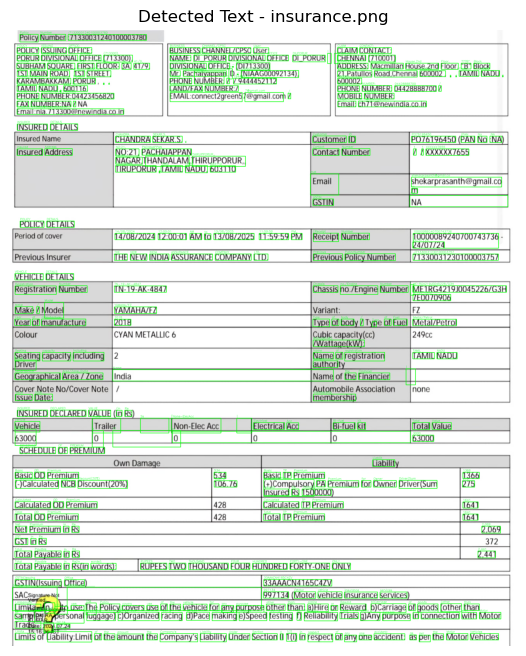

Extracted Text:

Policy Number :71330031240100003780
POUCY ISSUING OFFICE: BUSINESS CHANNEL/CPSC User: CLAIM CONTACT:
PORUR DIVISIONAL OFFICE (713300). NAME: DI_PORUR DIVISIONAL OFFICE DILPORUR | | CHENNAI! (710001)
SUBHAM SQUARE, FIRST FLOOR- 3A, 41/9, DIVISIONAL OFFICE - (DI713300) ADDRESS: Macmillan House.2nd Floor, “B" Block
1ST MAIN ROAD, 1ST STREET, Mr. Pachaiyappan D - (NIAAGO0092134), 21,Patullos Road,Chennal 600002. . . TAMIL NADU ,
KARAMBAKKAM, PORUR. . . PHONE NUMBER: 1 19444452112 600002.
TAMIL NADU , 600116. LAND/FAX NUMBER:/ PHONE NUMBER: 04428888700 /
PHONE NUMBER:04423456820 EMAIL:connect2green5 7@gmall.com / MOBILE NUMBER:
FAX NUMBER:NA / Email: ch71@newindia.co.in
Emall:nia.713300@newindla.co.in
INSURED DETAILS
CHANDRA SEKAR.S. . Customer ID PO76196450 (PAN No :NA
Insured Address NO:21, PACHAIAPPAN Contact Number 1 1 XXXXXX7655
NAGAR, THANDALAM, THIRUPPORUR,,
TIRUPORUR , TAMIL NADU, 603110
mat shekarprasanth@gmail.co
m
GSTIN INA
POLICY DETAILS
14/08/2024 12:00:01 AM t

In [81]:
for filename in os.listdir(image_folder):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
        image_path = os.path.join(image_folder, filename)
        print(f"\nProcessing: {filename}")
        #loading
        img = cv2.imread(image_path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        #preprocessing
        resized = cv2.resize(gray, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
        color_img = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
        _, binary = cv2.threshold(resized, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 1))
        cleaned = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=1)
        cleaned = cv2.medianBlur(cleaned, 3)
        #using tesseract for text detection
        config = r'--oem 3 --psm 6'
        data = pytesseract.image_to_data(cleaned, output_type=pytesseract.Output.DATAFRAME, config=config)
        data = data[data.text.notnull()]
        #bounding boxes
        for i, row in data.iterrows():
            x, y, w, h = row['left'], row['top'], row['width'], row['height']
            text = row['text']
            cv2.rectangle(color_img, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(color_img, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (36, 255, 12), 1)
            #text reconstruction
        lines = data.groupby(['block_num', 'par_num', 'line_num'])['text'].apply(' '.join).reset_index()
        full_text = "\n".join(lines['text'])
        results.append((filename, full_text.strip()))
        #output
        plt.figure(figsize=(14, 8))
        plt.imshow(cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB))
        plt.title(f"Detected Text - {filename}")
        plt.axis('off')
        plt.show()
        
        print("Extracted Text:\n")
        print(full_text)
        print("-" * 100)